In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import scikitplot as skplt
import warnings

In [3]:
warnings.filterwarnings('ignore')

/Users/dayosangowawa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
binarized_df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')
binarized_df.head()

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [5]:
binarized_df.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
y = binarized_df.pop('accommodation_type')
X = pd.get_dummies(binarized_df, drop_first=True)

In [7]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.7486373556474343


In [8]:
lb = preprocessing.LabelBinarizer()

In [9]:
y = lb.fit_transform(y)

#'0 'if it is 'I 'and '1' if it is 'other'. 

In [10]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [11]:
y = y.ravel()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [13]:
X_train.shape

(72946, 407)

In [17]:
lsvc = LinearSVC()

In [18]:
lsvc.fit(X_train, y_train)

LinearSVC()

In [21]:
print('Accuracy score - train set:', lsvc.score(X_train, y_train))
print('Accuracy score - test set:', lsvc.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(lsvc, X_train, y_train, cv=5).mean())

Accuracy score - train set: 0.8960052641680147
Accuracy score - test set: 0.8962548664802324
Mean CV score - train:  0.8883283005293171


In [32]:
params = {'penalty': ['l1', 'l2'], 
        'loss' :['hinge', 'squared_hinge'],
         'C': np.linspace(1, 2, 10)}

In [33]:
lsvc_gs = GridSearchCV(estimator= lsvc, param_grid=params, cv=5)

In [34]:
lsvc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ]),
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [36]:
lsvc_gs.best_score_

0.8954431702817585

In [37]:
lsvc_gs.best_params_

{'C': 1.1111111111111112, 'loss': 'hinge', 'penalty': 'l2'}

In [38]:
lsvc_best = LinearSVC(C = 1.1111111111111112, loss = 'hinge', penalty= 'l2')

In [40]:
lsvc_best.fit(X_train, y_train)

LinearSVC(C=1.1111111111111112, loss='hinge')

In [41]:
print('Accuracy score - train set:', lsvc_best.score(X_train, y_train))
print('Accuracy score - test set:', lsvc_best.score(X_test, y_test))
print('Mean CV score - train: ', cross_val_score(lsvc_best, X_train, y_train, cv=5).mean())

Accuracy score - train set: 0.8952649905409481
Accuracy score - test set: 0.894226024017108
Mean CV score - train:  0.8809939305205725


In [42]:
y_test_pred = lsvc_best.predict(X_test)

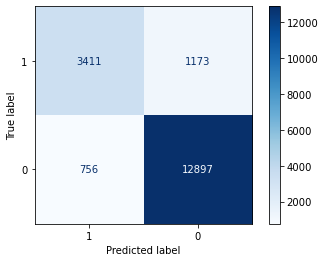

In [43]:
confus_matrix = plot_confusion_matrix(lsvc_best, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.savefig('rfc_confusion_matrix.png', dpi=300, bbox_inches = "tight")
plt.show()

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     13653
           1       0.82      0.74      0.78      4584

    accuracy                           0.89     18237
   macro avg       0.87      0.84      0.85     18237
weighted avg       0.89      0.89      0.89     18237



In [49]:
y_train_pred = lsvc_best.predict(X_train)

In [50]:
print('Area under the curve : ', roc_auc_score(y_train, y_train_pred))

Area under the curve :  0.8461865818801445
